# HOMEWORK 1

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from time import time
%matplotlib inline 

### SEBASTIAN JOSUE ENDARA 00323096

## 1. Assume we implemented an algorithm that has complexity approximately $nlog(n)$ . How much faster is this implementation compared to one of complexity $n^2$.


### Para determinar cual algoritmo es mas rapido, se comparara las graficas de sus respectivas complejidades teoricas de tiempo de ejecucion.

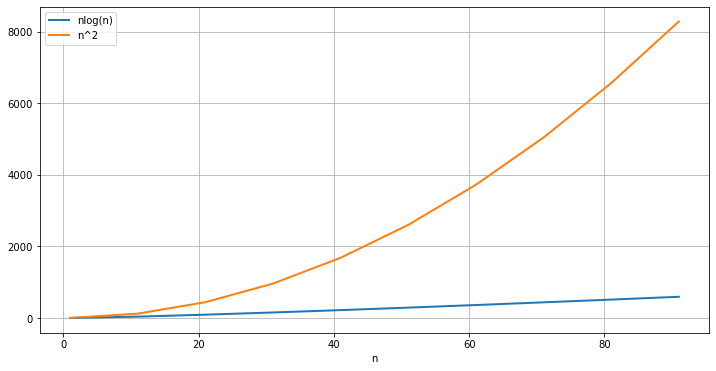

In [21]:
"""
En esta seccion se reutilizara codigo de las diapositivas de la clases, para graficas las funciones.
"""
r=pd.DataFrame() #inicializo el dataframe. 
r['n']=np.arange(1,100,10) 
r['nlog(n)']=r['n']*np.log2(r['n']) #se define la
r['n^2']=np.power(r['n'],2) #se define la funcion n^2
r.plot(x='n',lw=2,figsize=(12,6))# se grafica el dataframe que contiene las dos funciones
plt.grid()

### Al analizar las graficas de complejidades teoricas de tiempo de ejecucion, se observa que $nlog(n)$ tiene menor tiempo de ejecucion a medida que el n aumenta en comparacion con el $n^2$ que tiene mayor tiempo de ejecucion a medida que el n aumenta. Por lo tanto, el algoritmo con complejidad de $nlog(n)$ es mas rapido que el algoritmo de complejidad $n^2$.  

#### Ejercicio 1 hecho en colaboracion con Cristian Santamaria.

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

### Basandose en los datos de la tabla, se procedera a graficar la funcion de tiempo de ejecucion:

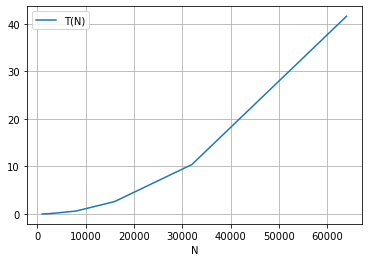

In [15]:
"""
De igual manera, se reutilizara codigo de las diapositivas de las clases, para graficar la funcion.
"""
N = [1000, 2000, 4000, 8000, 16000, 32000, 64000] # inicializacion de la lista con los valores de n
Run_time = [0.0,0.02,0.2,0.6,2.6,10.4,41.6] # inicializacion de la lista con los valores de tiempo de ejecucion

df1 = pd.DataFrame(zip(N, Run_time)) #inicializo dataFrame que contenga en sus columnas las listas de la habla
df1.columns = ['N', 'T(N)']
df1.plot(x = 'N', y ='T(N)') # se grafica el dataframe 
plt.grid()

### Al observar la grafica parece que el crecimiento de tiempo de ejecucion sigue una funcion cuadratica de tipo:

$T(n) = a n^2 + b n + c$

Para determinar los coeficientes de la funcion cuadratica, se hara uso de un metodo de numpy que busca una regresion polinomial de grado 2 para el conjunto de datos (N, Run_time), y asi se utilizaran estos coeficientes como aproximaciones de los coeficientes reales, ya que si se requiere buscar los exactos es muy dificil de obtenerlos. 


In [18]:
reg = np.poly1d(np.polyfit(df1['N'],df1['T(N)'],2)) #Metodo para obtener la regresion polinomial de grado 2
print(reg.coefficients) #impresion de los coeficientes correspondientes para a, b y c

[ 1.01566290e-08  1.29194971e-07 -8.82265276e-03]


Por lo tanto, se obtiene que la funcion de de tiempo de ejecucion es la siguiente:

$T(n) = 1.01 * 10^{-8}  n^2 + 1.29 * 10^{-7} n- 8.82 * 10^{-3}$

Para probar nuestra funcion se reemplazara n con los valores de 64000 y 32000:

- $T(n) = 1.01 * 10 ^{-8} * (64000)^2 + 1.29 * 10^{-7} *(64000) - 8.82 * 10^{-3} = 41.61$

- $T(n) = 1.01 * 10 ^{-8} * (32000)^2 + 1.29 * 10^{-7} *(32000) - 8.82 * 10^{-3} = 10.39$

Como se observa, los valores que arroja esta funcion se aproximan o hasta coinciden con los resultados esperados, por lo tanto, la funcion cuadratica obtenida es valida.

#### Ejercicio 2 hecho en colaboracion con Cristian Santamaria.

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

```
                                                                    Costo        Veces
def func1(n):  
    A = range(0,n)                                                    c1           1            
    sum = 0                                                           c2           1
    i = 0                                                             c3           1
    for x in A[i:]:                                                   c4           n
        i += 1                                                        c5           n-1
        for j in range(i, len(A)):                                    c6           n*(n-1)
            y = A[j]                                                  c7           (n-1)*(n-1)
            k = j                                                     c8           (n-1)*(n-1)
            while k < len(A):                                         c9           log(n)*(n-1)*(n-1)
                z = A[k]                                              c10          log(n)*(n-1)*(n-1)
                k = 2*k                                               c11          log(n)*(n-1)*(n-1)
                if x + y <= z:                                        c12          log(n)*(n-1)*(n-1)
                    sum += 1                                          c13          log(n)*(n-1)*(n-1)
    return sum
```

Una vez realizado el analisis de costo y tiempo de la funcion, se procede a desarrollar la formula de tiempo de ejecucion:

$T(n) = c1 + c2 + c3 + c4 * (n) + c5 *(n-1) + c6 * (n *(n-1)) + c7 * ((n-1)*(n-1)) + c8 * ((n-1)*(n-1)) + c9 * log(n)*(n-1)*(n-1) + c10 * log(n)*(n-1)*(n-1) + c11 * log(n)*(n-1)*(n-1) + c12 * log(n)*(n-1)*(n-1) + c13 * log(n)*(n-1)*(n-1)$

A continuacion se procede a reducir la expresion a agrupar los coeficientes con variables n similares:

$T(n) = (c1 + c2 + c3 - c5 - c6 + c7 + c8 + c9 + c10 + c11 + c12 + c13)+ n *(c4 + c5 ) - 2 n * ( c7 + c8 + c9 + c10 + c11 + c12 +c13) +  n^2 * (c6 + c7 + c8 + c9 + c10 + c11 + c12 + c13) + log (n) * (c9 + c10 + c11 + c12 + c13)$

Se hacen las siguientes identidades:

$ a = c9 + c10 + c11 + c12 + c13, b = (c6 + c7 + c8 + c9 + c10 + c11 + c12 + c13 ) - (c9 + c10 + c11 + c12 + c13), c = ( c7 + c8 + c9 + c10 + c11 + c12 +c13) +  (c4 + c5 ), d = (c1 + c2 + c3 - c5 - c6 + c7 + c8 + c9 + c10 + c11 + c12 + c13)$

Y se observa que se tiene la siguiente funcion cubica de forma:

$T(n) = a log (n) + b n^2 - 2 c n + d $

Ahora, para determinar la complejidad toca resolver cual es el peor caso para la funcion de tiempo de ejecucion:

En el peor de los casos n tiende a infinito, por tanto, el n que tenga el mayor exponente va quedar como la parte de la funcion que mas magnitud va a dar al resultado acompañado con la multiplicacion del logaritmo de n, el cual tambien ese significativo, por tanto se tiene que la complejidad de la funcion es:

$O (n^2 log(n))$


#### Ejercicio 3 hecho en colaboracion con Cristian Santamaria.

### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime

### Primero se declara las funciones y el respectivo decorator para medir el tiempo de ejecucion

In [4]:
""" 
Primero hay que saber que un decorator en python permite agregar funcionalidades a funciones que ya se encuentran definidas.
En este caso se agregara cuanto tiempo se demora en ejecutar la funcion.
"""
from time import sleep
def clock_time_dec(funcion): #declaracion del decorator (es como declarar una funcion)
    def wrapper(*args,**kwargs):#definicion de la funcion envoltura, que toma de parametros lo que se ingrese en la funcion
        time_1 = time()*10**6#tiempo inicial
        salida = funcion(*args, **kwargs)#Ejecucion de funcion
        time_2 = time()*10**6#tiempo final
        return salida, (time_2-time_1)-(1*10**6) #retorno de funcion y tiempo de ejecucion, se resta el segundo de retraso por sleep
    return wrapper
""""
Declaracion funciones de sumatoria.
"""
@clock_time_dec # uso de decorator sobre la funcion sum1
def sum1(n):
    sleep(1)
    total = 0
    for i in range(1, n+1):
        total += i
    return total

@clock_time_dec  # uso de decorator sobre la funcion sum1
def sum2(n): 
    sleep(1)
    total = n*(n+1)//2
    return total
        


4.1 Demostracion de que ambas funciones devuelven los mismos resultados para n = 5, 8, 103, 527

In [5]:
test_1=[5,8,103,527]
results_1=[]
results_2=[]
print("SUMATORIAS CON sum1: ")
for i in range(0,len(test_1)):#bucle que itera por cada n para obtener la suma con sum1.
    results_1.append(sum1(test_1[i])[0])
print(results_1)#impresion lista con los resultados con sum1.
print("SUMATORIAS CON sum2: ")
for i in range(0,len(test_1)):#bucle que itera por cada n para obtener la suma con sum2.
    results_2.append(sum2(test_1[i])[0])
print(results_2)#impresion lista con los resultados con sum2.
if (results_1==results_2): # condicional que nos avisa si ambas listas son iguales.
    print("Contienen los mismo resultados.")

SUMATORIAS CON sum1: 
[15, 36, 5356, 139128]
SUMATORIAS CON sum2: 
[15, 36, 5356, 139128]
Contienen los mismo resultados.


Se observa que ambas funciones si devuelven los mismos resultados para esos valores de n.

4.2 Impresion tiempos de ejecucion para los siguientes valores de n:

In [6]:
test_2 = [1,10,100,10**4,10**5,10**6,10**7,10**8,10**9]
tiempos_1=[]
tiempos_2=[]
print("Tiempos de ejecucion con sum1")
a=0
b=0
v=0
for i in range(0,len(test_2)):
    print("Para n = ",test_2[a])
    v=sum1(test_2[i])[1]
    print("Total: ",v, "Microsegundos")
    tiempos_1.append(v)#impresion de cada tiempo de ejecucion con sum1.
    a+=1
    v=0

print("\nTiempos de ejecucion con sum2")
for i in range(0,len(test_2)):
    print("Para n = ",test_2[b])
    v1=sum2(test_2[i])[1]
    print("Total: ",v1, "Microsegundos")
    tiempos_2.append(v1)#impresion de cada tiempo de ejecucion con sum2.
    b+=1
    v1=0

Tiempos de ejecucion con sum1
Para n =  1
Total:  14312.25 Microsegundos
Para n =  10
Total:  10846.75 Microsegundos
Para n =  100
Total:  9694.25 Microsegundos
Para n =  10000
Total:  10680.25 Microsegundos
Para n =  100000
Total:  17253.0 Microsegundos
Para n =  1000000
Total:  47217.25 Microsegundos
Para n =  10000000
Total:  449581.0 Microsegundos
Para n =  100000000
Total:  4339712.5 Microsegundos
Para n =  1000000000
Total:  42772405.0 Microsegundos

Tiempos de ejecucion con sum2
Para n =  1
Total:  11779.0 Microsegundos
Para n =  10
Total:  12901.5 Microsegundos
Para n =  100
Total:  10573.0 Microsegundos
Para n =  10000
Total:  7967.75 Microsegundos
Para n =  100000
Total:  12111.0 Microsegundos
Para n =  1000000
Total:  6180.25 Microsegundos
Para n =  10000000
Total:  10525.75 Microsegundos
Para n =  100000000
Total:  13871.75 Microsegundos
Para n =  1000000000
Total:  14118.75 Microsegundos


4.3 Para graficar los tiempos de ejecucion se utilizara las listas (tiempos_1 y tiempos_2) obtenidas en la parte anterior a esta seccion de la pregunta.

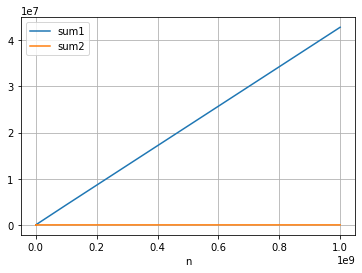

In [7]:
df_tiempos = pd.DataFrame()#inicializo dataframe
df_tiempos['n']= test_2#asignacion columna n con valores de n
df_tiempos['sum1']=tiempos_1 # asignacion columna sum1 con los valores de ejecucion con sum1
df_tiempos['sum2']=tiempos_2 # asignacion columna sum 2 con los valores de ejecucion con sum2
df_tiempos.plot(x='n')# se grafica el dataframe
plt.grid()


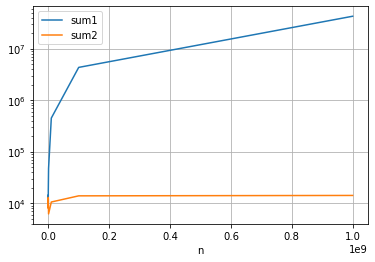

In [8]:
"""
Para observar y analizar de mejor manera las dos curvas, se procede a utilizar logy = true, en el codigo del grafico
"""
df_tiempos = pd.DataFrame()#inicializo dataframe
df_tiempos['n']= test_2#asignacion columna n con valores de n
df_tiempos['sum1']=tiempos_1 # asignacion columna sum1 con los valores de ejecucion con sum1
df_tiempos['sum2']=tiempos_2 # asignacion columna sum 2 con los valores de ejecucion con sum2
df_tiempos.plot(x='n',logy=True)# se grafica el dataframe
plt.grid()


Se observa claramente que el tiempo de ejecucion (en microsegundos) en sum 1 es mucho mas grande que el de sum 2.

4.4 Para obtener la funcion de forma analitica se puede observar las graficas de cada una de las funciones, y asi poder determinar que tipo de funcion sigue.

Con respecto a la funcion sum1, se observa que tiene la forma de una funcion lineal tal que su tiempo de ejecucion sea igual a:

$T(n) = a n + b$

Por lo tanto, como la grafica muestra que la funcion intercepta en 0, se dice que b = 0.

Entonces, solo queda determinar el valor de a. Para esto se utilizara el valor de tiempo de ejecucion y su valor de n correspodiente.

$T(1000000000) = a * 1000000000 $

$42772405 = a * 1000000000 $

$42772405 / 1000000000 = a $

$42772405 * 10^{-9} = a$

Por lo tanto, la funcion estimada para sum1 es:

$T(n) = 42772405 * 10^{-9} n$


Con respecto a la funcion sum2, se observa que tiene la forma de una funcion constante tal que su tiempo de ejecucion sea igual a: 

$T(n) = c$

Como los valores de tiempo de ejecucion son muy pequeños en comparacion con sum_1, se podria decir que la constante c de la funcion de tiempo de ejecucion tambien es muy pequeña.

Por lo tanto, la funcion estimada para sum2 es:

$T(n) = c$

4.5 Para estimar cuanto se demora en correr T(n) si $n = 10^{100}$, se utilizaran las funciones estimadas en la seccion anterior:

Para sum1: 

$T(n) = 42772405 * 10^{-9} (10^{100})$

$T(n) = 42772405 * 10^{91} $ microsegundos 

Para sum2:

$T(n) = $ constante pequeña en microsegundos

La diferencia es muy evidente al momento de correr cada una de las funciones, ya que sum1 se demora mucho tiempo en ejecutar cuando n es muy grande, pero en cambio sum2 se demora una constante pequeña en ejecutar cuando n es muy grande.

#### Ejercicio 4 hecho en colaboracion con Cristian Santamaria.

### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

Antes que nada, se sabe que la funcion de tiempo de ejecucion va a ser: 

$T(n)$, y dentro del contexto de la siguiente explicacion, se tomara a $T(n) = f(n)$

Entonces, una vez aclarado esto, partimos de la definicion de $\Theta(g(n))$, la cual dice lo siguiente:

> $\Theta(g(n)) = \{f(n) : \exists c_1, c_2, n_0 > 0, \text{such that } 0 \leq c_1g(n) \leq f(n) \leq c_2g(n), \forall n \geq n_0 \}$

La cual establece un limite inferior y superior para $f(n)$:

$0\leq c_1g(n) \leq f(n) \leq c_2g(n)$

En donde si se mira por separado las inecuaciones se tiene lo siguiente:

-Inecuacion izquierda:

#### $0 \leq c_1g(n) \leq f(n)$ es igual a decir que $f(n) = \Omega(g(n))$

Ya que por definicion de $\Omega (g(n))$, se tiene lo siguiente:

> $\Omega(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq cg(n) \leq f(n), \forall n \geq n_0 \}$

Esto nos da como resultado que el limite inferior de la acotacion a $f(n)$ es igual a $\Omega(g(n))$, e indica el tiempo de ejecucion para el mejor de los casos del algoritmo. 

-Inecuacion derecha:

#### $f(n) \leq c_2g(n)$ es igual a decir que $f(n)=O(g(n))$

Ya que por definicion de $O(g(n))$, se tiene lo siguiente:

> $O(g(n)) = \{f(n) : \exists c, n_0 > 0 \text{ such that } 0 \leq f(n) \leq cg(n), \forall n \geq n_0 \}$

Esto nos da como resultado que el limite superior de la acotacion a $f(n)$ es igual a $O(g(n))$, y por definicion tambien  indica el tiempo de ejecucion para el peor de los casos del algoritmo. 

Por lo tanto, al cumplirse que: 


$f(n) = \Theta (g(n))$, implica inmediatamente que $f(n)=O(g(n))$ y $f(n) = \Omega(g(n))$.



### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

### Para ordenar decrecientemente las siguientes funciones dependiendo de su complejidad se procedera a graficarlas:

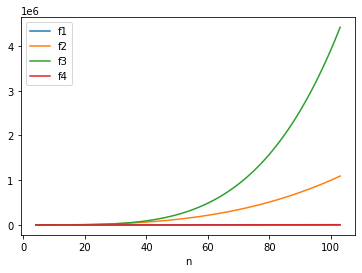

In [77]:
""" 
A continuacion, se procede a definir cada una de las funciones:
"""
def f1(n): #funcion 1
    return (math.sqrt(n)) #raiz cuadrada usando la libreria math

def f2(n): # funcion 2
    return(n**3) #cubo

def f3(n): #funcion 3
        combi = math.factorial(n)/(math.factorial(4)*math.factorial(n-4)) #formula de combinatoria
        return combi
def f4(n): #funcion 4
    if(n<2):
        return 0
    else:
        suma=0
        it=2
        for i in range(2,n+1):#sumatoria
            suma+=(it-1)
            it+=1
        return suma 

"""
Ahora se procede a graficar cada funcion:

"""
x=range(4,104,1)
graf = pd.DataFrame()#inicializo DataFrame
graf['n'] = x
graf['f1'] = [f1(n) for n in x]
graf['f2'] = [f2(n) for n in x]
graf['f3'] = [f3(n) for n in x]
graf['f4'] = [f4(n) for n in x]
graf.plot(x='n')#grafica de las funciones

Como se observa la grafica de $f3(n) =  {n\choose 4}$ es mucho mas creciente con respecto al tiempo de ejecucion a medida que n crece, por lo tanto esta ocupara el primer lugar de nuestro orden decreciente, tambien se observa que la funcion $f2(n) =  n^3$ crece bastante pero no tanto como $f3(n)$, por lo tanto, $f2(n)$ ocupara el segundo lugar del orden.

Para determinar las siguientes posiciones, se graficara denuevo las funciones, pero sin $f3(n) ={n\choose 4}$ y $f2(n) = n^3$:


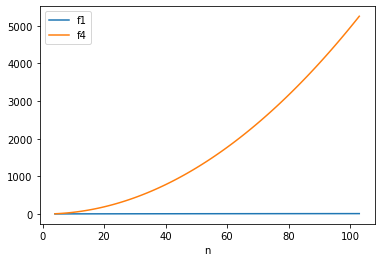

In [81]:
"""
Mismo procedimiento que arriba, pero sin f2 ni f3:

"""
x1=range(4,104,1)#r
graf = pd.DataFrame()#inicializo DataFrame
graf['n'] = x1
graf['f1'] = [f1(n) for n in x1]
graf['f4'] = [f4(n) for n in x1]
graf.plot(x='n')#grafica de las funciones

Como se observa la grafica de $f4(n) =\sum_{i=2}^n (i-1) $  es mucho mas creciente con respecto al tiempo de ejecucion a medida que n crece, por lo tanto esta ocupara el tercer lugar de nuestro orden decreciente, y por lo tanto, $f1(n) = \sqrt{n}$ ocupara el ultimo puesto.

Entonces nuestro conjunto de funciones ordenado decrecientemente por su complejidad queda de la siguiente forma:
- $f_3(n) = {n\choose 4}$
- $f_2(n) = n^3$
- $f_4(n) = \sum_{i=2}^n (i-1)$
- $f_1(n) = \sqrt{n}$



### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.

#### Para implementar los metodos de "delete", primero se tiene que transcribir la clase Array y sus metodos correspodientes que se encuentran en las diapositivas.

In [69]:
"""
A continuacion se procede a implementar la clase Array que fue vista en las sesiones de la clase.
"""
import ctypes
class Array(object):#CLASE ARRAY 
    
    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)
            
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item

            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    def list_array2(self):    
        y = []    
        for x in self:
            if x is not None:
                y.append(str(x))
            else:
                y.append('_')
        return ", ".join(y)
    

    


## DELETE LAST

In [103]:
"""
A continuacion se procede a implementar los metodos que pide el enunciado.

Primero se implementa el delete para el ultimo elemento del array.
"""
class Array(Array):
    def delete_last(self):
        if self.l>0:
            self.array[self.l-1]=None #se elimina el ultimo elemento 
            self.l-=1 # se disminuye el valor de la longitud del array
        else:
            raise Error("No se puede eliminar elementos de un array vacio")
                   
A=Array(5,[1,2,3,4,5]) # inicializo un array de 5 elementos.
print(A.list_array())#imprimo array antes de ejecutar el metodo.
A.delete_last()
A.delete_last()#elimino los dos ultimos elementos.
print(A.list_array())#imprimo array despues de ejecutar el metodo.

1, 2, 3, 4, 5
1, 2, 3, _, _


## DELETE FIRST ITEM

In [104]:
"""
A continuacion, se implementa el metodo delete que elimina el ultimo elemento del array. 
"""
class Array(Array):
    def delete_first_item(self):
        if self.l>0:
            self.array[0]=None # elimino el primer elemento
            for i in range(0,self.l-1):
                self.array[i]=self.array[i+1] #recorro el array hacia la izquierda
            self.array[self.l-1]=None # elimino el ultimo elemento del array para que no este repetido con el penultimo
            self.l-=1 # se disminuye el valor de la longitud del array
        else:
            raise Error("No se puede eliminar elementos de un array vacio")
            
        
A=Array(5,[1,2,3,4,5]) # inicializo un array de 5 elementos.
print(A.list_array())#imprimo array antes de ejecutar el metodo.
A.delete_first_item()
A.delete_first_item()#elimino dos veces el primer elemento.
print(A.list_array())#imprimo array despues de ejecutar el metodo.

1, 2, 3, 4, 5
3, 4, 5, _, _


## DELETE USING INDEX

In [110]:
"""
A continuacion, se implementa el metodo usando el index pasado por el usuario. 
"""
class Array(Array):
    def delete_using_index(self,index):
        if self.l>0:
            if index<self.l:
                self.array[index]=None # elimino el primer elemento
                for i in range(index,self.l-1):
                    self.array[i]=self.array[i+1] #recorro el array hacia la izquierda
                self.array[self.l-1]=None # elimino el ultimo elemento del array para que no este repetido con el penultimo
                self.l-=1 # se disminuye el valor de la longitud del array
            else:
                raise IndexError("No se puede eliminar elementos de un array vacio")
        else:
            raise Error("No se puede eliminar elementos de un array vacio")
        
A=Array(5,[1,2,3,4,5]) # inicializo un array de 5 elementos.
print(A.list_array())#imprimo array antes de ejecutar el metodo.
A.delete_using_index(3) # elimino el elemento con index 3 en este caso se debe ir el valor '4'
print(A.list_array())#imprimo array despues de ejecutar el metodo.

1, 2, 3, 4, 5
1, 2, 3, 5, _
